In [3]:
import pandas as pd
import plotnine
plotnine.options.figure_size = (12, 10)

ess2018 = pd.read_csv("https://github.com/CALDISS-AAU/course_ddf/raw/master/datasets/ESS2018DK_subset.csv")

# Udforskning af korrelationer

En række visualiseringer hjælper med at give indblik i umiddelbare sammenhænge (korrelationer) i data. 

I dette introduceres til diverse visualiseringer, der har til formål at udforske korrelationer, samt hvordan disse laves med `ggplot2/plotnine`.

**Indhold**
- Heatmap (herunder crosstab)

## Scatterplots

Scatterplots mapper observationer fra to variable og danner et punkt for hver observations placering langs de to akter, som variable danner.

I `ggplot2`/`plotnine` dannes et scatterplot med `geom_point` (se flere eksempler i modul 3):

C:\Users\kgk\.conda\envs\tm\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


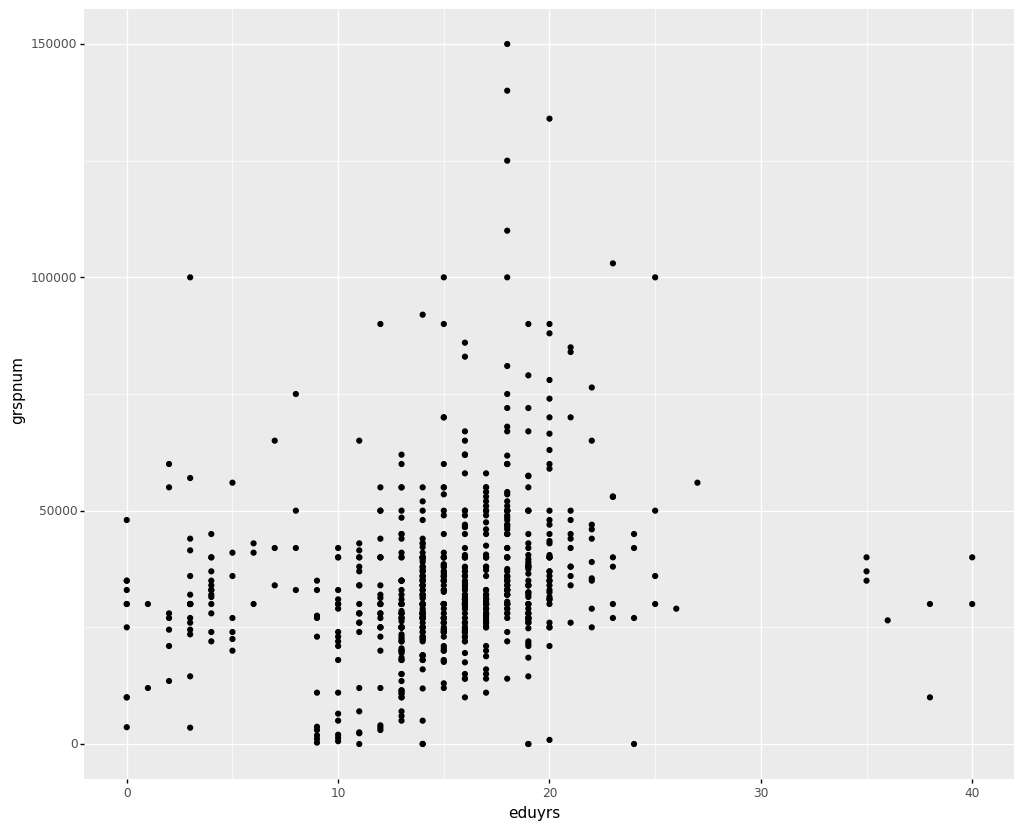

<ggplot: (-9223371906259154368)>

In [4]:
from plotnine import ggplot, aes, geom_point

ess2018_filt = ess2018.loc[ess2018['grspnum'] <= 200000, :] # Sorterer ekstreme værdier fra (max 200000 om måneden)

(ggplot(data = ess2018_filt, mapping = aes(x = 'eduyrs', y = 'grspnum')) 
 + geom_point())

## Fitted linje

I `ggplot2`/`plotnine` kan man danne en fitted linje mellem to variable. Dette kan hjælpe til at opsummere det mønster, som fremgår af et scatterplot. 

Plottet `geom_smooth` bruges til at fitte en linje mellem to variable. Sammenlignet med mange af de visualiseriner, som er blevet gennemgået, involverer denne en eller anden form for mellemregning for at beregne, hvordan linjen skal fittes. 

I `ggplot2`/`plotnine` dannes en fitted linje med `geom_smooth`:

C:\Users\kgk\.conda\envs\tm\lib\site-packages\plotnine\stats\smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


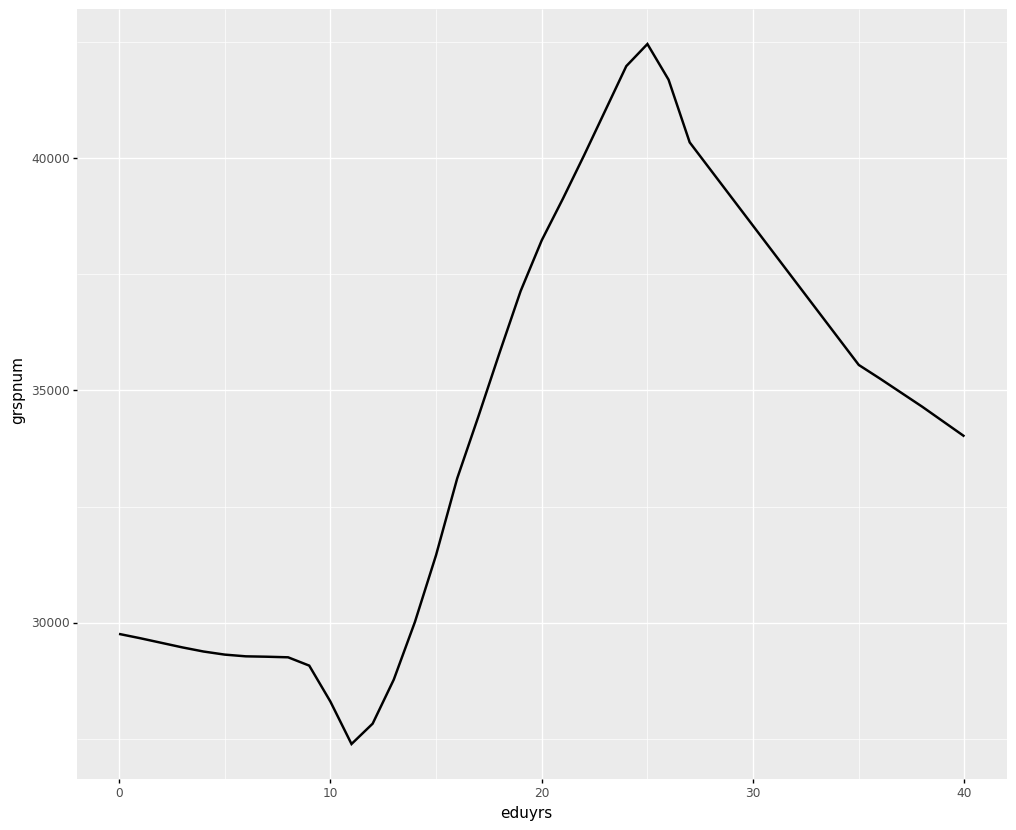

<ggplot: (-9223371906257866172)>

In [5]:
from plotnine import geom_smooth

(ggplot(data = ess2018_filt, mapping = aes(x = 'eduyrs', y = 'grspnum')) 
 + geom_smooth())

Som standard bruges "local polynomial regression fitting" for datasæt med færre end 1.000 observationer (kort sagt: for hvert x fittes punktet på y ud fra observationer på x eller tæt på x. Læs mere [her](https://rdrr.io/r/stats/loess.html).) 

Det er muligt at fitte andre linjer - fx en lineær regression - ved at specificere en anden metode med `method`:

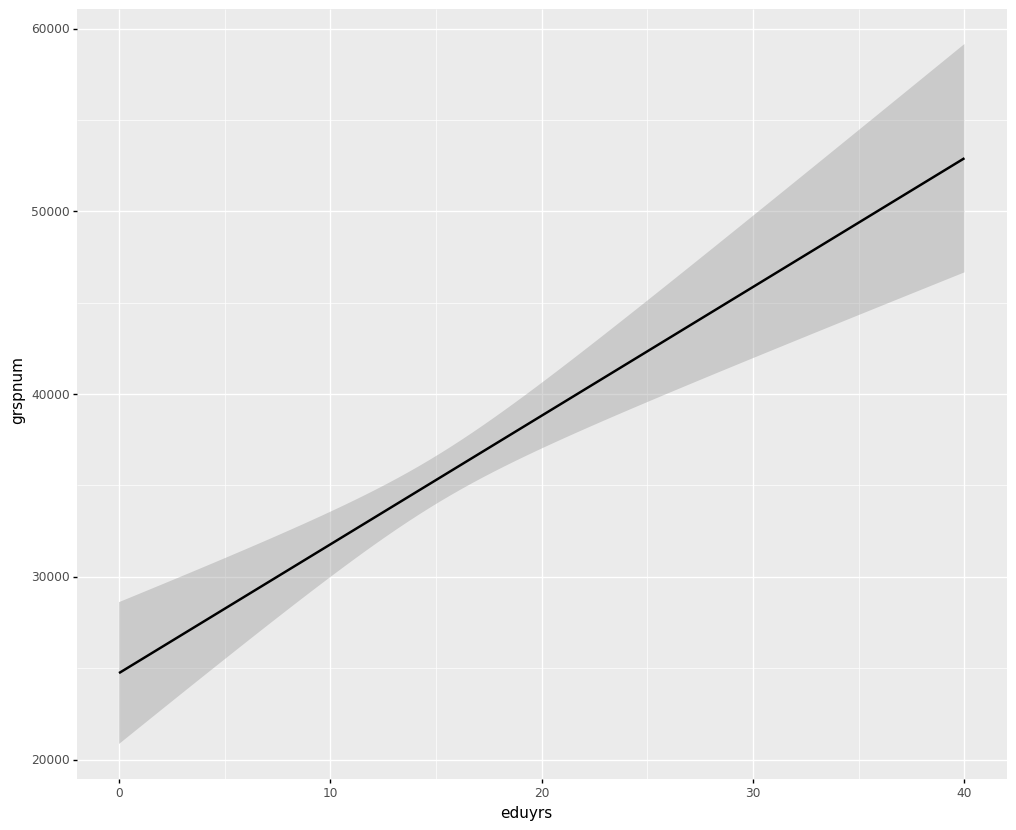

<ggplot: (-9223371906258600296)>

In [6]:
(ggplot(data = ess2018_filt, mapping = aes(x = 'eduyrs', y = 'grspnum')) 
 + geom_smooth(method = 'lm'))

En fitted linje kan også kombineres med et scatterplot:

C:\Users\kgk\.conda\envs\tm\lib\site-packages\plotnine\stats\smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
C:\Users\kgk\.conda\envs\tm\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


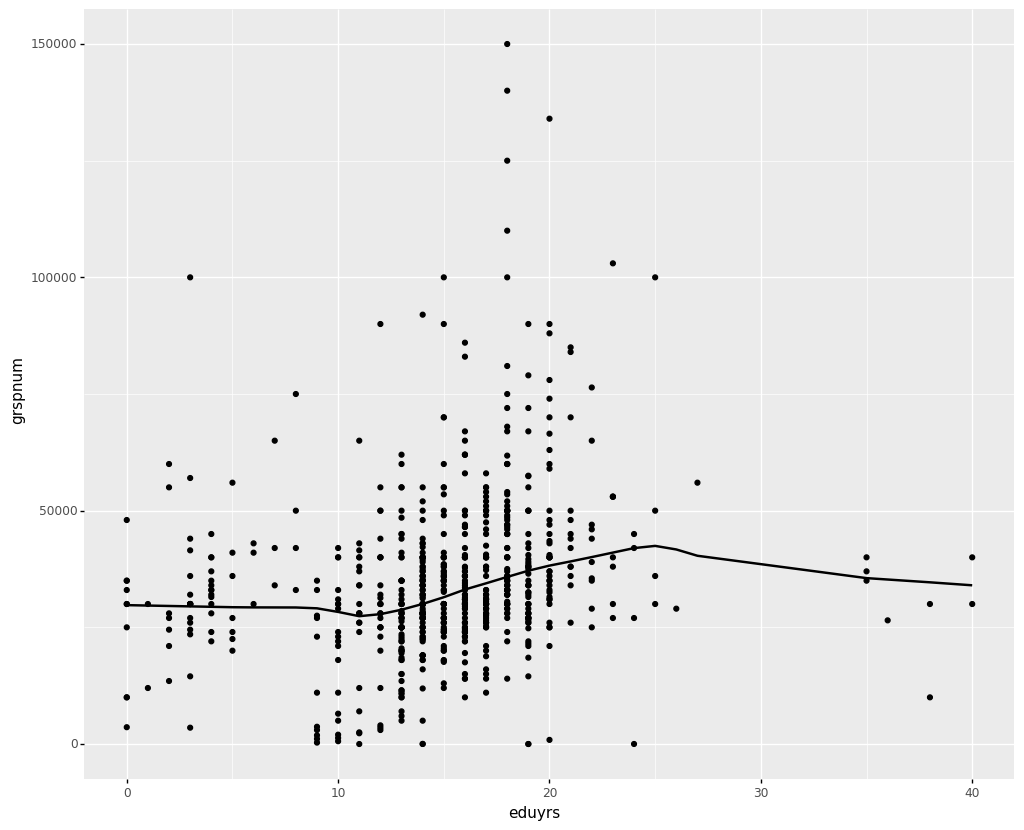

<ggplot: (-9223371906258338772)>

In [7]:
(ggplot(data = ess2018_filt, mapping = aes(x = 'eduyrs', y = 'grspnum')) 
 + geom_point()
 + geom_smooth())

## Jitterplots

Scatterplots egner sig ikke til kategoriske variable, da man ofte ender med mange prikker oveni hinanden:

C:\Users\kgk\.conda\envs\tm\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


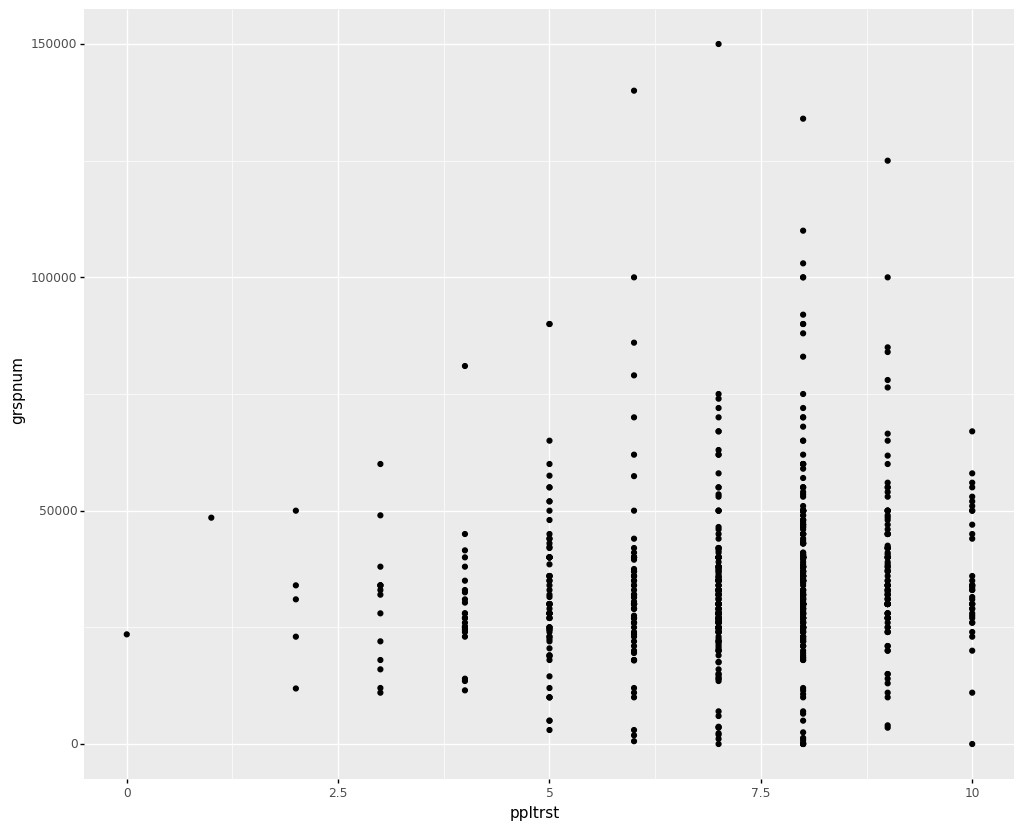

<ggplot: (-9223371906257467780)>

In [8]:
(ggplot(data = ess2018_filt, mapping = aes(x = 'ppltrst', y = 'grspnum')) 
 + geom_point())

"Jitterplots" er en variant af et scatterplot, der egner sig til kategoriske variable. Jitterplottet spreder punkter med samme x-værdi ud.

Jitterplots danned med `geom_jitter`:

C:\Users\kgk\.conda\envs\tm\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_jitter : Removed 2 rows containing missing values.


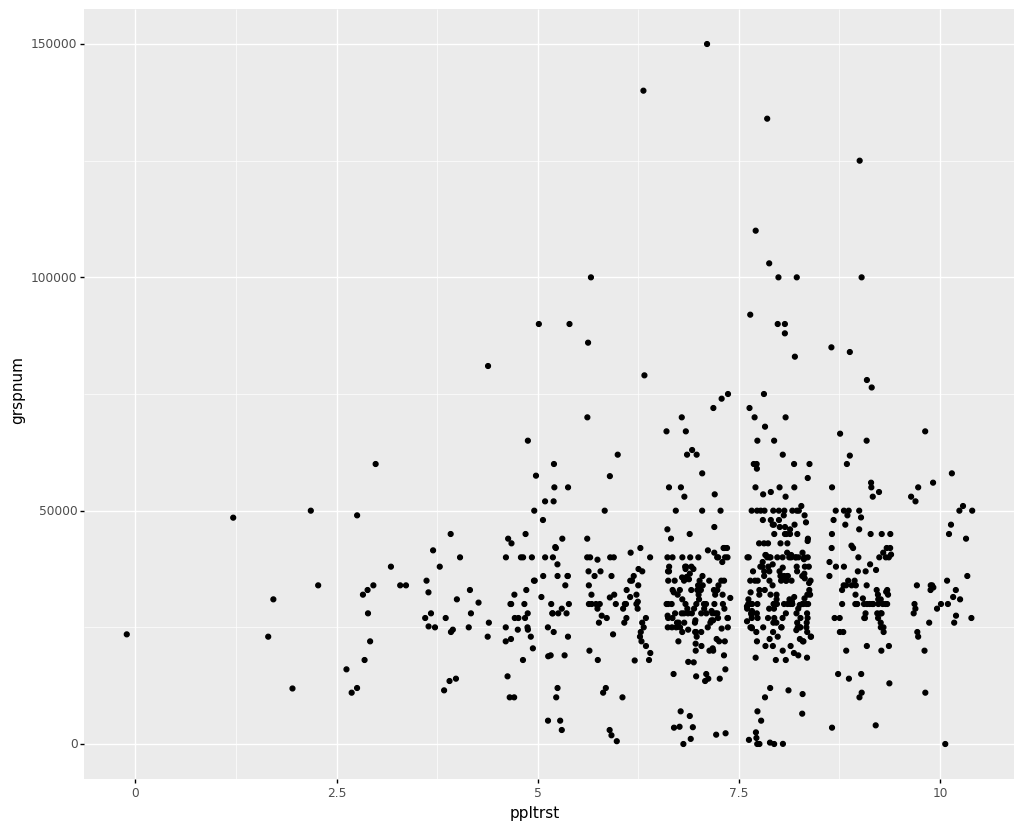

<ggplot: (-9223371906257425812)>

In [9]:
from plotnine import geom_jitter

(ggplot(data = ess2018_filt, mapping = aes(x = 'ppltrst', y = 'grspnum')) 
 + geom_jitter())

# Heatmaps

Ved to kategoriske variable, kan det hurtigt blive uoverskueligt at udforske korrelationer med jitterplots. Alternativt kan man visualisere korrelationen som et heatmap over en krydstabulering.

Heatmaps kan dannes på flere måder. En af dem er med `geom_tile`. Denne danner en rubrik for hver kombination af x og y, som så kan farvelægges efter antal. 

For at kunne lave denne kræves derfor først en krydstabulering af de variable, som skal visualiseres. Dernæst skal dataformatet laves om, så det er kompatibelt med `plotnin`.

## Crosstabs

Pandas funktionen `pd.crosstab` [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html?highlight=crosstab) bruges til at danne en krydstabulering af to variable. Den tager som minimum to varaible/kolonner som input:

In [10]:
crosstab = pd.crosstab(ess2018['ppltrst'], ess2018['prtvtddk'])
crosstab

prtvtddk,Alternativet - The Alternative,Dansk Folkeparti - Danish People's Party,Det Konservative Folkeparti - Conservative People's Party,Det Radikale Venstre - The Radical Liberal Party,Enhedslisten - Unity List - The Red-Green Alliance,Kristendemokraterne - Christian Democrats,Liberal Alliance - Liberal Alliance,Other,SF Socialistisk Folkeparti - Socialist People's Party,Socialdemokratiet - The Social democrats,"Venstre, Danmarks Liberale Parti - The Liberal Party"
ppltrst,,,,,,,,,,,
0.0,0,1,0,0,0,0,0,0,0,0,0
1.0,0,1,0,0,0,0,0,0,0,1,0
2.0,0,5,2,0,0,0,0,0,1,4,2
3.0,0,7,1,1,1,0,3,0,1,7,2
4.0,1,10,1,1,3,0,1,2,2,16,8
5.0,3,26,5,1,4,0,2,1,2,33,24
6.0,4,23,4,2,4,0,5,0,4,22,24
7.0,8,30,5,14,16,2,15,3,12,67,54
8.0,18,38,15,24,23,5,9,3,23,97,100


Data kan normaliseres med argumentet `normalize`. `all` normaliserer over alle værdier, `columns` normaliserer inden for hver kolonne:

In [11]:
crosstab_norm = pd.crosstab(ess2018['ppltrst'], ess2018['prtvtddk'], normalize = 'columns')
crosstab_norm

prtvtddk,Alternativet - The Alternative,Dansk Folkeparti - Danish People's Party,Det Konservative Folkeparti - Conservative People's Party,Det Radikale Venstre - The Radical Liberal Party,Enhedslisten - Unity List - The Red-Green Alliance,Kristendemokraterne - Christian Democrats,Liberal Alliance - Liberal Alliance,Other,SF Socialistisk Folkeparti - Socialist People's Party,Socialdemokratiet - The Social democrats,"Venstre, Danmarks Liberale Parti - The Liberal Party"
ppltrst,,,,,,,,,,,
0.0,0.000000,0.006536,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,0.000000,0.006536,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.003333,0.000000
2.0,0.000000,0.032680,0.045455,0.000000,0.0000,0.000000,0.000000,0.000000,0.015625,0.013333,0.007905
3.0,0.000000,0.045752,0.022727,0.016129,0.0125,0.000000,0.076923,0.000000,0.015625,0.023333,0.007905
4.0,0.021739,0.065359,0.022727,0.016129,0.0375,0.000000,0.025641,0.181818,0.031250,0.053333,0.031621
5.0,0.065217,0.169935,0.113636,0.016129,0.0500,0.000000,0.051282,0.090909,0.031250,0.110000,0.094862
6.0,0.086957,0.150327,0.090909,0.032258,0.0500,0.000000,0.128205,0.000000,0.062500,0.073333,0.094862
7.0,0.173913,0.196078,0.113636,0.225806,0.2000,0.181818,0.384615,0.272727,0.187500,0.223333,0.213439
8.0,0.391304,0.248366,0.340909,0.387097,0.2875,0.454545,0.230769,0.272727,0.359375,0.323333,0.395257


## Heatmaps over crosstabs

En crosstab kan med fordel danne grundlag for et heatmap. `plotnine` forventer dog "tidy format" (én række per observation). Derfor skal krydstabuleringen først konverteres til et tidy format.

Nedenstående gør følgende:
- Data konverteres til tidy med metoden `.stack()` - danner en series
- Series konverteres til data frame med metoden `to_frame`. Kolonnen med tællinger navngives "count"
- Index nulstilles så de bliver til kolonner i stedet med metoden `.reset_index()

In [12]:
crossstack = crosstab.stack().to_frame(name = 'count').reset_index()
crossstack.head()

,ppltrst,prtvtddk,count
0,0.0,Alternativet - The Alternative,0
1,0.0,Dansk Folkeparti - Danish People's Party,1
2,0.0,Det Konservative Folkeparti - Conservative Peo...,0
3,0.0,Det Radikale Venstre - The Radical Liberal Party,0
4,0.0,Enhedslisten - Unity List - The Red-Green Alli...,0


Krydstabuleringen kan nu visualieres. Bemærk brug af `factor()`. Dette er en funktion fra R, der fortæller, at værdierne skal behandles som afgrænsede/kategoriske værdier:

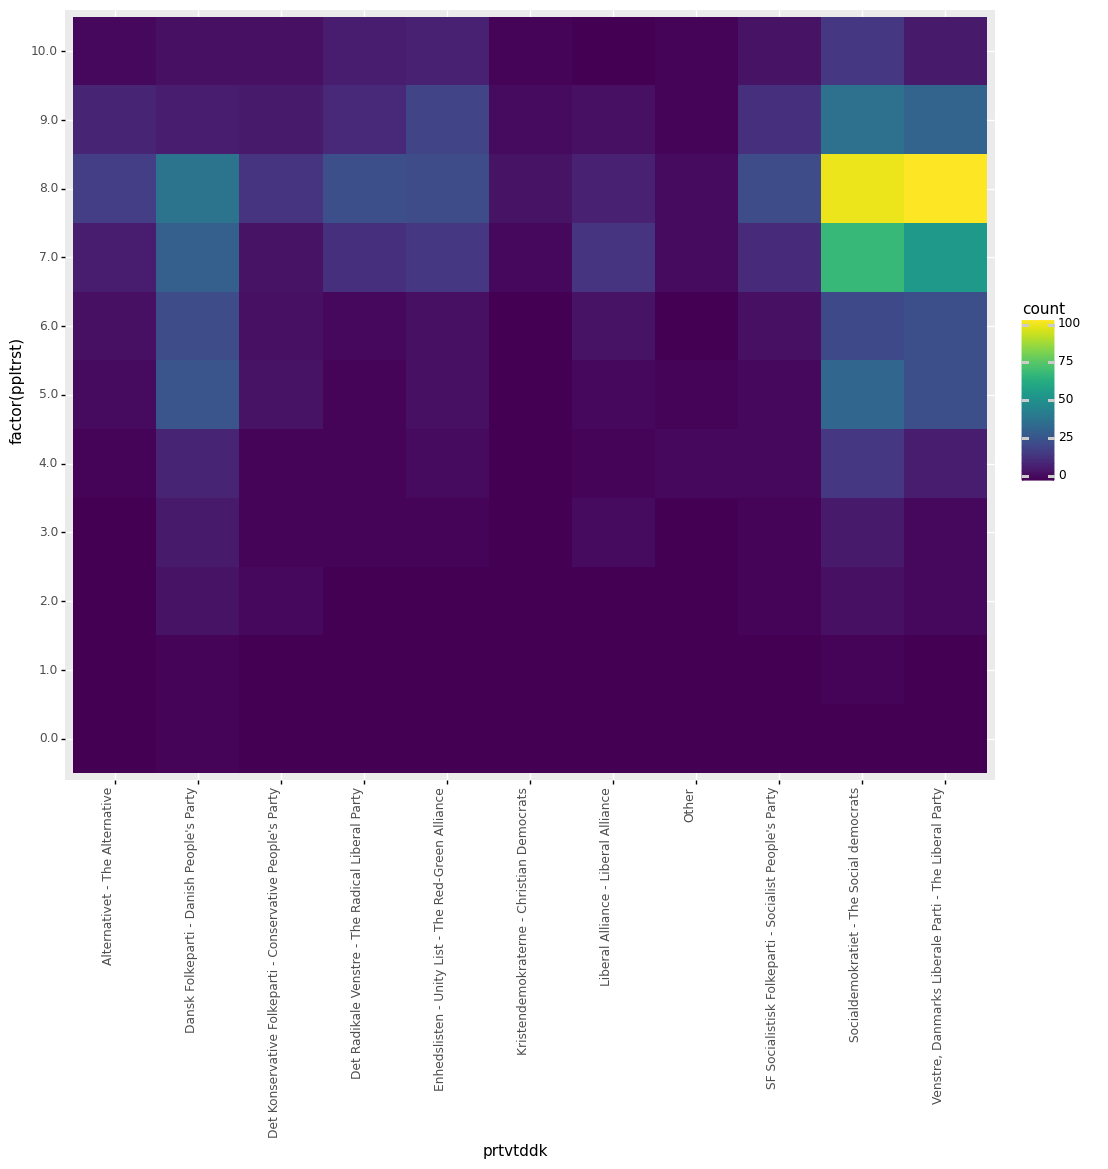

<ggplot: (-9223371906255900592)>

In [13]:
from plotnine import geom_tile, theme, element_text

(ggplot(data = crossstack, mapping = aes(x = 'prtvtddk', y = 'factor(ppltrst)', fill = 'count')) 
 + geom_tile()
 + theme(axis_text_x=element_text(rotation=90, hjust=1)))

# ØVELSE 3: KORRELATIONER

Vi ønsker at udforske sammenhængen mellem kommentaraktivitet "post_num_comments" og score for et redditopslag ("post_score") i datasættet [reddit_rdenmark-comments_01032021-08032021_long.csv](https://raw.githubusercontent.com/CALDISS-AAU/course_ddf/master/datasets/reddit_rdenmark-comments_01032021-08032021_long.csv).

Lav en passende visualisering til at udforske dette.

Bemærk!: Rækkerne i data er kommentarer, hvor information om opslaget, som kommentaren er under, ligger i kolonner med præfix "post_". Derfor er informationen om opslaget gentaget for hver række. I bør derfor filtrere data sådan, at I kun har én række per opslag, inden I laver visualiseringen (se metoden `drop_duplicates`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html). Opslaget kan unikt identificeres med kolonnen "post_id".